 ### Programming problem

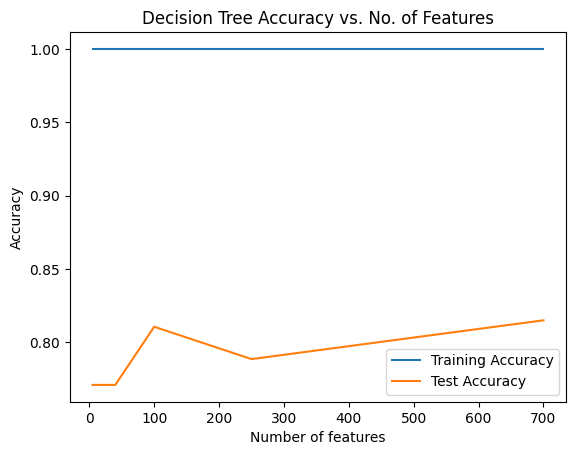

In [24]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

# Reading the ARFF file
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])

# Separate input from output data
X = df.drop('class', axis=1)
y = df['class']

# No. of features and empty lists to store training and test accuracies
num_feats = [5, 10, 40, 100, 250, 700]
train_acc = []
test_acc = []

# Encode variable as numeric
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)

# Loop over the number of features
for k in num_feats:
    # Feature selection
    fs = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_fs = fs.fit_transform(X_train, y_train)
    X_test_fs = fs.transform(X_test)
    # Fitting Decision Tree Classification to the Training set
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)
    classifier.fit(X_train_fs, y_train)
    # Predicting the Test set results and the training set results
    y_pred_test = classifier.predict(X_test_fs)
    y_pred_train = classifier.predict(X_train_fs)
    # Accuracy on training set and on test set
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))


# Plotting the results
plt.plot(num_feats, train_acc, label='Training Accuracy')
plt.plot(num_feats, test_acc, label='Test Accuracy')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. No. of Features')
plt.legend()
plt.show()
# selected features in these indexes = (5, 10, 40, 100, 250, 700)
# plot the training and testing accuracy

# From the above plot, we can see that the decision tree is overfitting the training data as the training accuracy is always 1.0.